In [1]:
corpus = ['king is a strong man',
          'king is an arrogant person',
          'queen is a wise woman',
          'long live the queen',
          'boy is a young man',
          'girl is a young woman',
          'prince is a young king',
          'princess is a young queen',
          'man is strong', 
          'woman is pretty',
          'prince is a boy will be king',
          'princess is a girl will be queen']

In [6]:
def remove_stop_words(corpus):
    stop_words = ['is', 'a', 'will', 'be', 'an', 'the']
    results = []
    for text in corpus:
        results.append(" ".join(word for word in text.split() if word not in stop_words))
        
    return results

In [7]:
corpus = remove_stop_words(corpus)
print(corpus)

['king strong man', 'king arrogant person', 'queen wise woman', 'long live queen', 'boy young man', 'girl young woman', 'prince young king', 'princess young queen', 'man strong', 'woman pretty', 'prince boy king', 'princess girl queen']


In [34]:
words = []
for text in corpus:
    for word in text.split():
        words.append(word)

words = set(words)
words

{'arrogant',
 'boy',
 'girl',
 'king',
 'live',
 'long',
 'man',
 'person',
 'pretty',
 'prince',
 'princess',
 'queen',
 'strong',
 'wise',
 'woman',
 'young'}

In [36]:
word2int = {}

for i, word in enumerate(words):
    word2int[word] = i
    
sentences = []
for sentence in corpus:
    sentences.append(sentence.split())

WINDOW_SIZE=2

data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence)) + 1] : 
            if neighbor != word:
                data.append([word, neighbor])

In [40]:
import pandas as pd
for text in corpus:
    print(text)

df = pd.DataFrame(data, columns = ['input', 'label'])

king strong man
king arrogant person
queen wise woman
long live queen
boy young man
girl young woman
prince young king
princess young queen
man strong
woman pretty
prince boy king
princess girl queen


In [41]:
df.head(10)

,input,label
0,king,strong
1,king,man
2,strong,king
3,strong,man
4,man,king
5,man,strong
6,king,arrogant
7,king,person
8,arrogant,king
9,arrogant,person


In [42]:
df.shape

(64, 2)

In [73]:
import tensorflow as tf
import numpy as np

ONE_HOT_DIM = len(words)

def to_one_hot_encoding(data_point_index):
    one_hot_encoding = np.zeros(ONE_HOT_DIM)
    one_hot_encoding[data_point_index] = 1
    return one_hot_encoding
    
X = []
Y = []

for x, y in zip(df['input'], df['label']):
    X.append(to_one_hot_encoding(word2int[ x ]))
    Y.append(to_one_hot_encoding(word2int[ y ]))

In [94]:
X_train = np.asarray(X)
Y_train = np.asarray(Y)

x = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))
y_label = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))

EMBEDDING_DIM = 2

W1 = tf.Variable(tf.random_normal([ONE_HOT_DIM, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([1]))
hidden_layer = tf.add(tf.matmul(x, W1), b1)

W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, ONE_HOT_DIM]))
b2 = tf.Variable(tf.random_normal([1]))
prediction = tf.nn.softmax(tf.add(tf.matmul(hidden_layer, W2), b2))

loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), axis=[1]))

train_op = tf.train.GradientDescentOptimizer(0.08).minimize(loss)

In [95]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

iteration = 60000
for i in range(iteration):
    sess.run(train_op, feed_dict={x: X_train, y_label: Y_train})
    
    if i%5000 == 0:
        print(f'iteration {str(i)} loss is: ', sess.run(loss, feed_dict={x: X_train, y_label: Y_train}))

iteration 0 loss is:  4.5437202
iteration 5000 loss is:  1.9264139
iteration 10000 loss is:  1.8777092
iteration 15000 loss is:  1.85835
iteration 20000 loss is:  1.8468821
iteration 25000 loss is:  1.8388498
iteration 30000 loss is:  1.8326695
iteration 35000 loss is:  1.8276279
iteration 40000 loss is:  nan
iteration 45000 loss is:  nan


KeyboardInterrupt: 

In [81]:
vectors = sess.run(W1 + b1)
print(vectors)

[[-0.72147876  0.12097299]
 [ 3.4555314  -5.119936  ]
 [-4.28032     1.3210902 ]
 [-0.07490373 -1.6675026 ]
 [-1.528894   -6.1964874 ]
 [-4.266158   -1.1903346 ]
 [-1.234953   -4.2090855 ]
 [ 1.8737142  -1.8444264 ]
 [-4.428856    1.7177982 ]
 [-4.045613   -2.2820697 ]
 [-2.7470438  -1.1806728 ]
 [-0.28425765 -0.5725767 ]
 [-2.858624   -1.766146  ]
 [ 1.306742   -1.5451467 ]
 [-0.6788972   0.01782405]
 [ 0.28498065 -0.5088031 ]]


In [84]:
w2v_df = pd.DataFrame(vectors, columns = ['x1', 'x2'])
w2v_df['word'] = words
w2v_df = w2v_df[['word', 'x1', 'x2']]
w2v_df

,word,x1,x2
0,queen,-0.721479,0.120973
1,strong,3.455531,-5.119936
2,live,-4.280320,1.321090
3,boy,-0.074904,-1.667503
4,prince,-1.528894,-6.196487
5,wise,-4.266158,-1.190335
6,man,-1.234953,-4.209085
7,person,1.873714,-1.844426
8,long,-4.428856,1.717798
9,princess,-4.045613,-2.282070


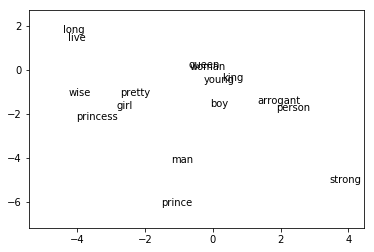

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1,x2 ))
    
PADDING = 1.0
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING
 
plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] = (10,10)

plt.show()

In [ ]:
sess.close()